In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_CMBS.csv') 

In [5]:
df.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1998-01-31 00:00:00,0.131980,#VALUE!,#VALUE!,0.405000,0.660023,0.671127,0.708245,0.624016,0.706001,0.000000,0.561522,0.173089,0.617685,0.318823,0.420055,0.242360,0.498648,1
1,1998-02-28 00:00:00,0.076142,#VALUE!,#VALUE!,0.779222,0.633513,0.691848,0.573015,0.616500,0.623432,0.000000,0.394141,0.231658,0.586884,0.243321,0.350215,0.261704,0.463807,1
2,1998-03-31 00:00:00,0.055838,#VALUE!,#VALUE!,0.576556,0.528896,0.602060,0.584834,0.246242,0.601879,0.033368,0.466896,0.175247,0.416437,0.193492,0.331136,0.197741,0.461774,1
3,1998-04-30 00:00:00,0.055838,#VALUE!,#VALUE!,0.442333,0.439477,0.484645,0.552395,0.000000,0.459356,0.020775,0.486104,0.228268,0.480389,0.081423,0.331909,0.134753,0.442481,3
4,1998-05-31 00:00:00,0.010152,#VALUE!,#VALUE!,0.617444,0.652790,0.453564,0.575822,0.000000,0.307336,0.069822,0.521219,0.112978,0.418787,0.085781,0.332143,0.201886,0.450922,3


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,267.000000,266.000000,266.000000,263.000000,263.000000,260.000000,260.000000,257.000000,257.000000,245.000000,245.000000,233.000000,233.000000,267.000000
mean,0.389551,0.508826,0.507331,0.502922,0.510516,0.503568,0.489132,0.511401,0.510328,0.513404,0.476935,0.502615,0.482371,2.528090
std,0.327368,0.260708,0.243181,0.274559,0.258519,0.283993,0.249247,0.276018,0.263561,0.296969,0.226476,0.312065,0.234052,1.062943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.129442,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.000000
50%,0.299492,0.510422,0.462486,0.493021,0.474618,0.501222,0.465767,0.519729,0.475128,0.491521,0.445444,0.483095,0.450922,3.000000
75%,0.472081,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 0 to 232
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              233 non-null    object 
 1   OAS                               190 non-null    float64
 2   Excess Return % 3-mo (Treasury)   233 non-null    float64
 3   Excess Return % 3-mo (Agg)        233 non-null    float64
 4   Excess Return % 6-mo (Treasury)   233 non-null    float64
 5   Excess Return % 6-mo (Agg)        233 non-null    float64
 6   Excess Return % 9-mo (Treasury)   233 non-null    float64
 7   Excess Return % 9-mo (Agg)        233 non-null    float64
 8   Excess Return % 12-mo (Treasury)  233 non-null    float64
 9   Excess Return % 12-mo (Agg)       233 non-null    float64
 10  Excess Return % 24-mo (Treasury)  233 non-null    float64
 11  Excess Return % 24-mo (Agg)       233 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 85th percentile (top 15%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 85th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.85) # every data point over the 85th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.44822335025000004


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,0.673552,0.530417,0.479025,0.555914,0.482919,0.572194,0.425855,0.635066,0.495973,0.706023,0.492672,0.684134,0.525097,2.517241
std,0.186544,0.345047,0.291851,0.353356,0.319535,0.349067,0.290035,0.271978,0.280136,0.252962,0.165307,0.184246,0.109137,0.949462
min,0.451777,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.386297,0.352019,1.000000
25%,0.482234,0.301122,0.258980,0.362384,0.253585,0.277610,0.129576,0.548397,0.278307,0.576402,0.412047,0.523407,0.459385,2.000000
50%,0.675127,0.570486,0.547653,0.637079,0.508612,0.627734,0.450282,0.669390,0.475995,0.747111,0.526496,0.642718,0.516257,3.000000
75%,0.857868,0.844536,0.677198,0.859520,0.668837,0.836848,0.670168,0.824137,0.739176,0.870074,0.607728,0.858908,0.556553,3.000000
max,0.979695,1.000000,1.000000,1.000000,1.000000,1.000000,0.874945,1.000000,0.973051,1.000000,0.684993,1.000000,0.767555,4.000000


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  29.0  0.673552  0.186544  0.034640   
 1  Excess Return % 3-mo (Treasury)  29.0  0.530417  0.345047  0.064074   
 2                         combined  58.0  0.601984  0.284236  0.037322   
 
    95% Conf.  Interval  
 0   0.602594  0.744509  
 1   0.399168  0.661666  
 2   0.527248  0.676720  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...   0.1431
 1                              Degrees of freedom =   56.0000
 2                                               t =    1.9651
 3                           Two side test p value =    0.0544
 4                          Difference < 0 p value =    0.9728
 5                          Difference > 0 p value =    0.0272
 6                                       Cohen's d =    0.5161
 7                                       Hedge's g =    0.5091
 8                        

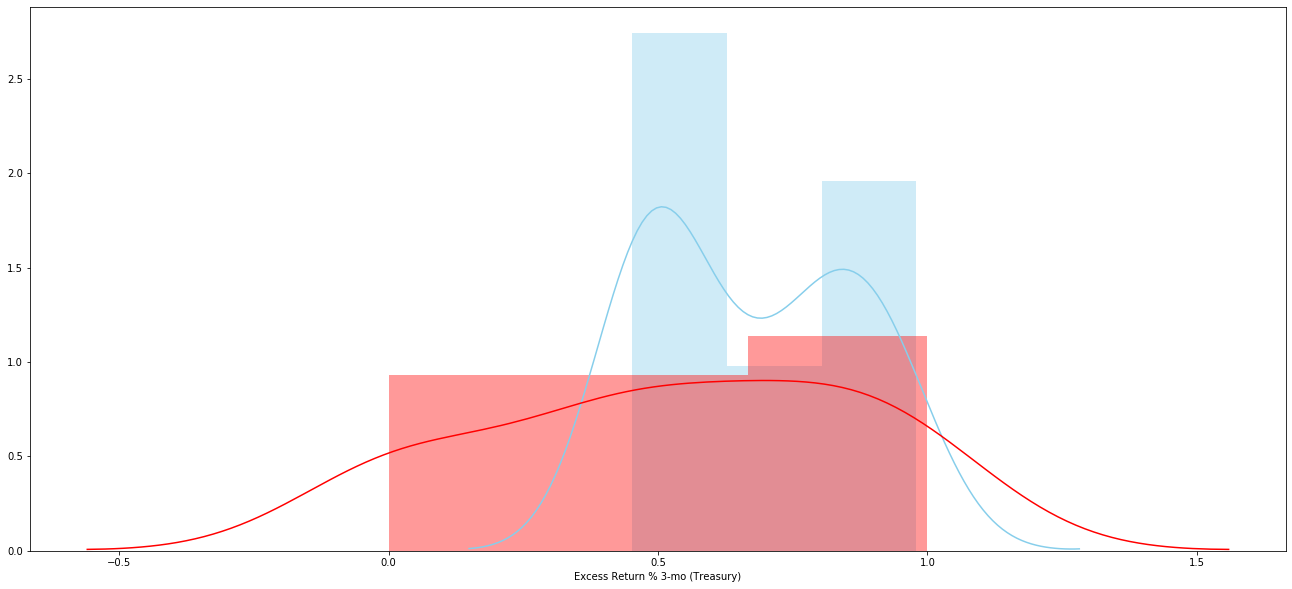

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  29.0  0.673552  0.186544  0.034640   0.602594   
 1  Excess Return % 3-mo (Agg)  29.0  0.479025  0.291851  0.054195   0.368010   
 2                    combined  58.0  0.576288  0.261843  0.034382   0.507440   
 
    Interval  
 0  0.744509  
 1  0.590039  
 2  0.645136  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =    0.1945
 1                             Degrees of freedom =   56.0000
 2                                              t =    3.0243
 3                          Two side test p value =    0.0038
 4                         Difference < 0 p value =    0.9981
 5                         Difference > 0 p value =    0.0019
 6                                      Cohen's d =    0.7942
 7                                      Hedge's g =    0.7835
 8                                  Glass's delta =    

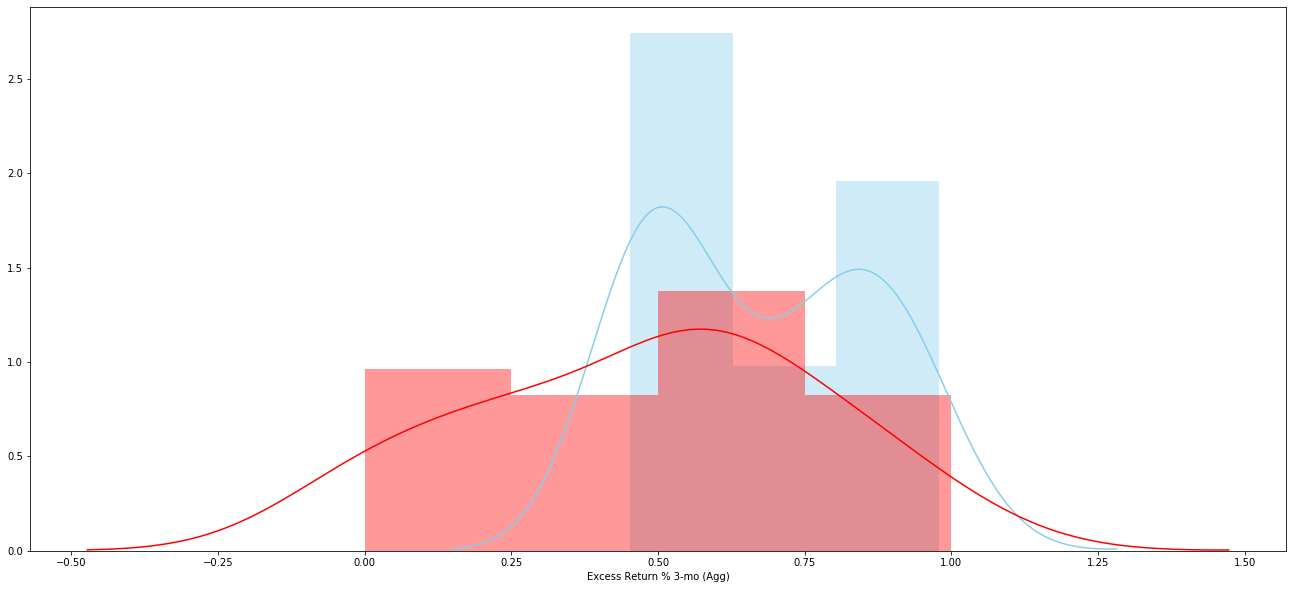

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  29.0  0.673552  0.186544  0.034640   
 1  Excess Return % 6-mo (Treasury)  29.0  0.555914  0.353356  0.065617   
 2                         combined  58.0  0.614733  0.286268  0.037589   
 
    95% Conf.  Interval  
 0   0.602594  0.744509  
 1   0.421505  0.690323  
 2   0.539463  0.690003  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...   0.1176
 1                              Degrees of freedom =   56.0000
 2                                               t =    1.5854
 3                           Two side test p value =    0.1185
 4                          Difference < 0 p value =    0.9408
 5                          Difference > 0 p value =    0.0592
 6                                       Cohen's d =    0.4164
 7                                       Hedge's g =    0.4108
 8                        

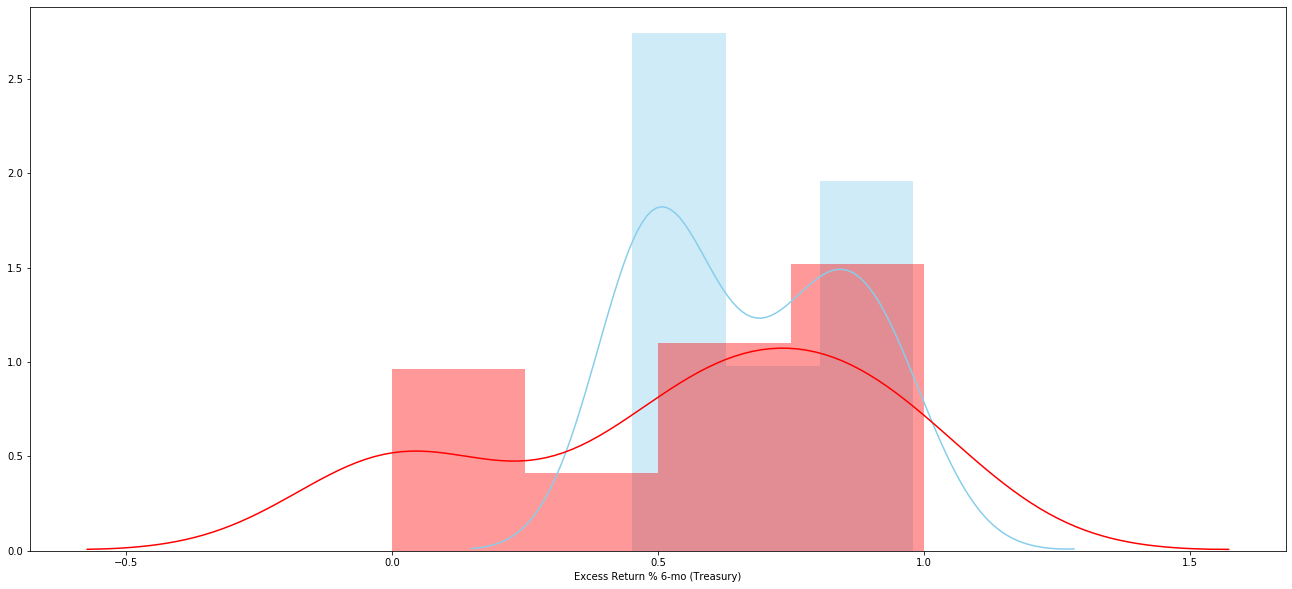

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  29.0  0.673552  0.186544  0.034640   0.602594   
 1  Excess Return % 6-mo (Agg)  29.0  0.482919  0.319535  0.059336   0.361375   
 2                    combined  58.0  0.578235  0.276576  0.036316   0.505513   
 
    Interval  
 0  0.744509  
 1  0.604464  
 2  0.650958  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =    0.1906
 1                             Degrees of freedom =   56.0000
 2                                              t =    2.7745
 3                          Two side test p value =    0.0075
 4                         Difference < 0 p value =    0.9963
 5                         Difference > 0 p value =    0.0037
 6                                      Cohen's d =    0.7286
 7                                      Hedge's g =    0.7188
 8                                  Glass's delta =    

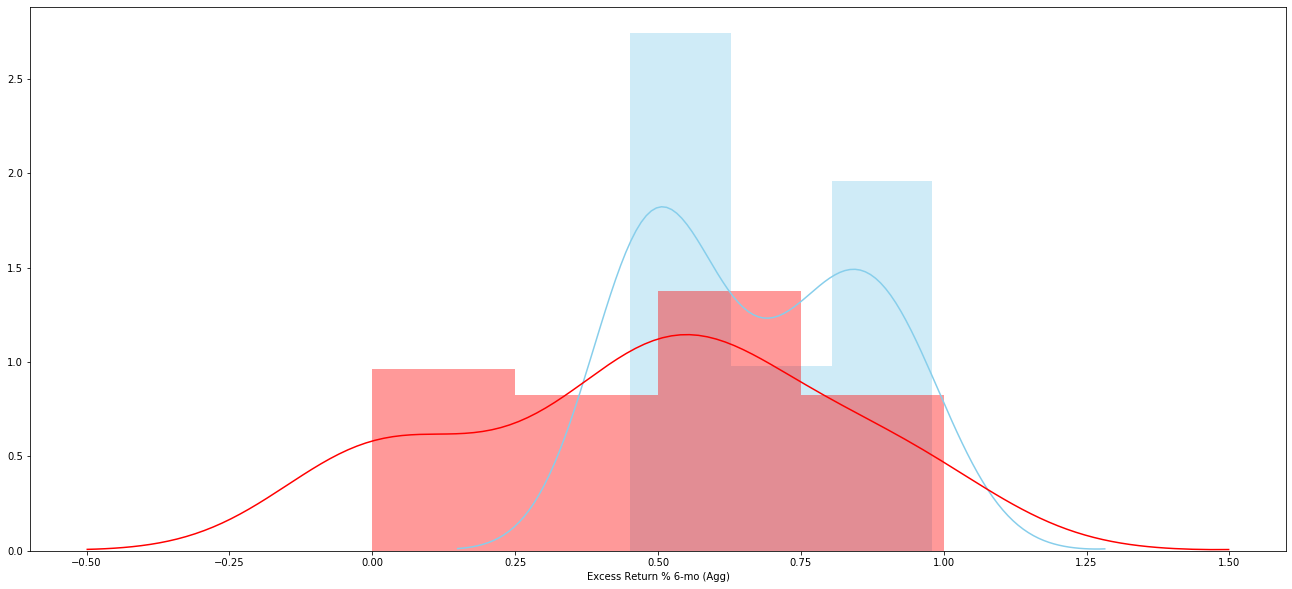

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  29.0  0.673552  0.186544  0.034640   
 1  Excess Return % 9-mo (Treasury)  29.0  0.572194  0.349067  0.064820   
 2                         combined  58.0  0.622873  0.282069  0.037037   
 
    95% Conf.  Interval  
 0   0.602594  0.744509  
 1   0.439416  0.704972  
 2   0.548706  0.697039  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...   0.1014
 1                              Degrees of freedom =   56.0000
 2                                               t =    1.3791
 3                           Two side test p value =    0.1733
 4                          Difference < 0 p value =    0.9133
 5                          Difference > 0 p value =    0.0867
 6                                       Cohen's d =    0.3622
 7                                       Hedge's g =    0.3573
 8                        

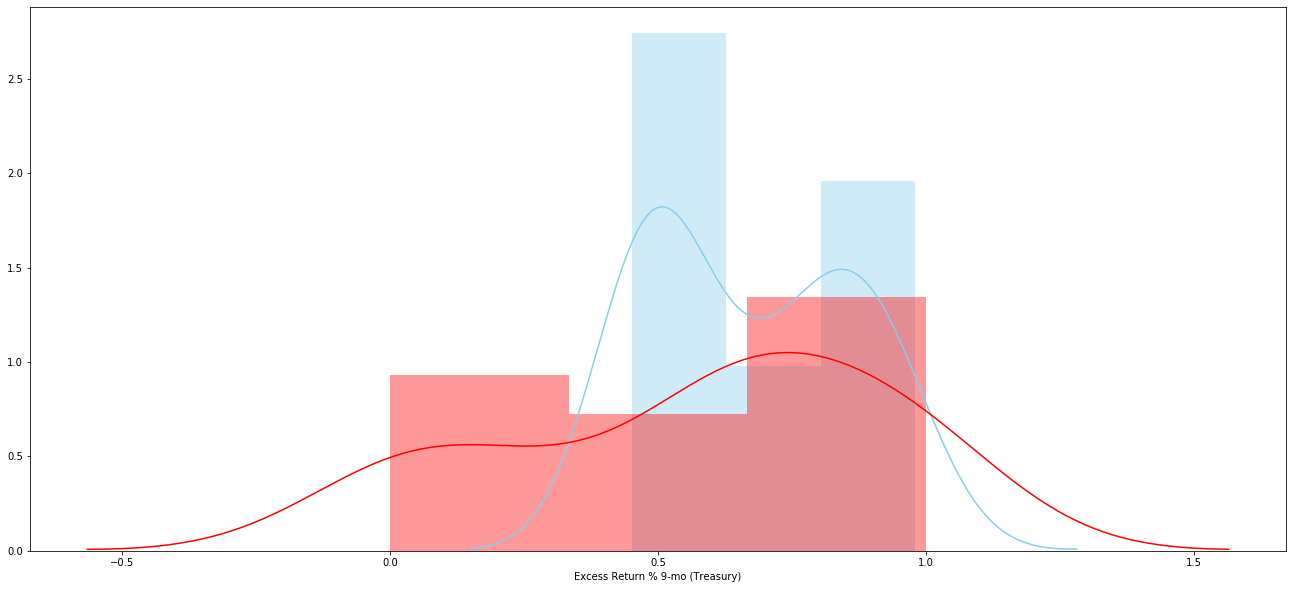

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  29.0  0.673552  0.186544  0.034640   0.602594   
 1  Excess Return % 9-mo (Agg)  29.0  0.425855  0.290035  0.053858   0.315532   
 2                    combined  58.0  0.549703  0.272073  0.035725   0.478165   
 
    Interval  
 0  0.744509  
 1  0.536178  
 2  0.621241  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =    0.2477
 1                             Degrees of freedom =   56.0000
 2                                              t =    3.8681
 3                          Two side test p value =    0.0003
 4                         Difference < 0 p value =    0.9999
 5                         Difference > 0 p value =    0.0001
 6                                      Cohen's d =    1.0158
 7                                      Hedge's g =    1.0021
 8                                  Glass's delta =    

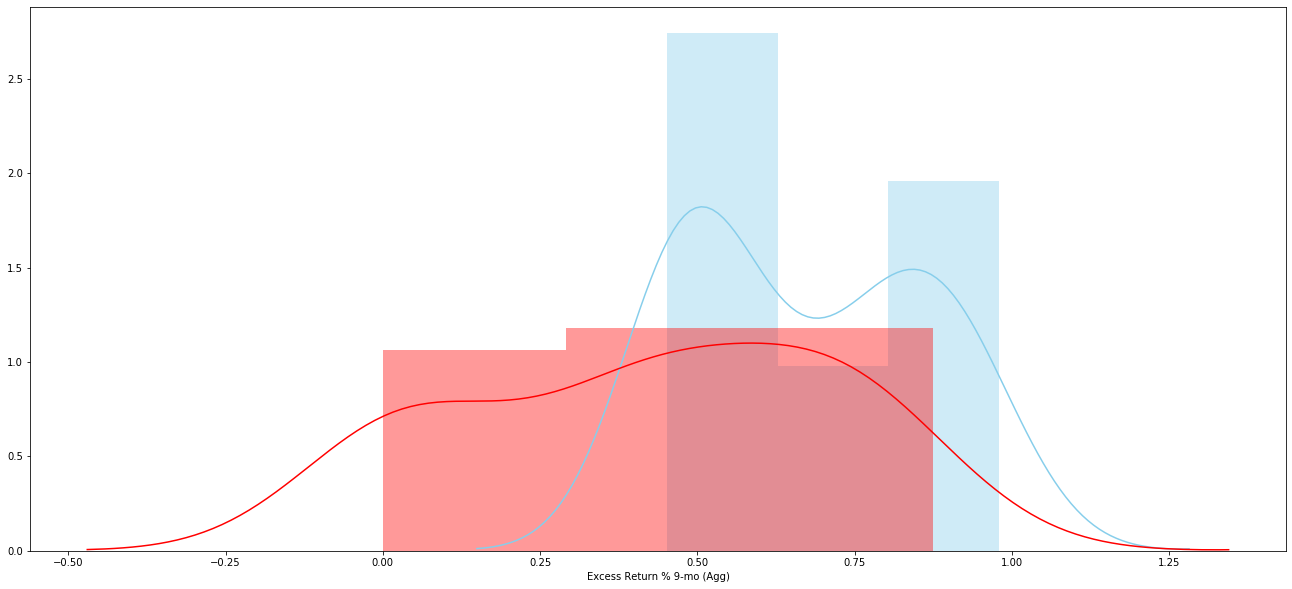

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  29.0  0.673552  0.186544  0.034640   
 1  Excess Return % 12-mo (Treasury)  29.0  0.635066  0.271978  0.050505   
 2                          combined  58.0  0.654309  0.231966  0.030459   
 
    95% Conf.  Interval  
 0   0.602594  0.744509  
 1   0.531612  0.738521  
 2   0.593317  0.715301  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Treas...   0.0385
 1                              Degrees of freedom =   56.0000
 2                                               t =    0.6284
 3                           Two side test p value =    0.5323
 4                          Difference < 0 p value =    0.7339
 5                          Difference > 0 p value =    0.2661
 6                                       Cohen's d =    0.1650
 7                                       Hedge's g =    0.1628
 8                    

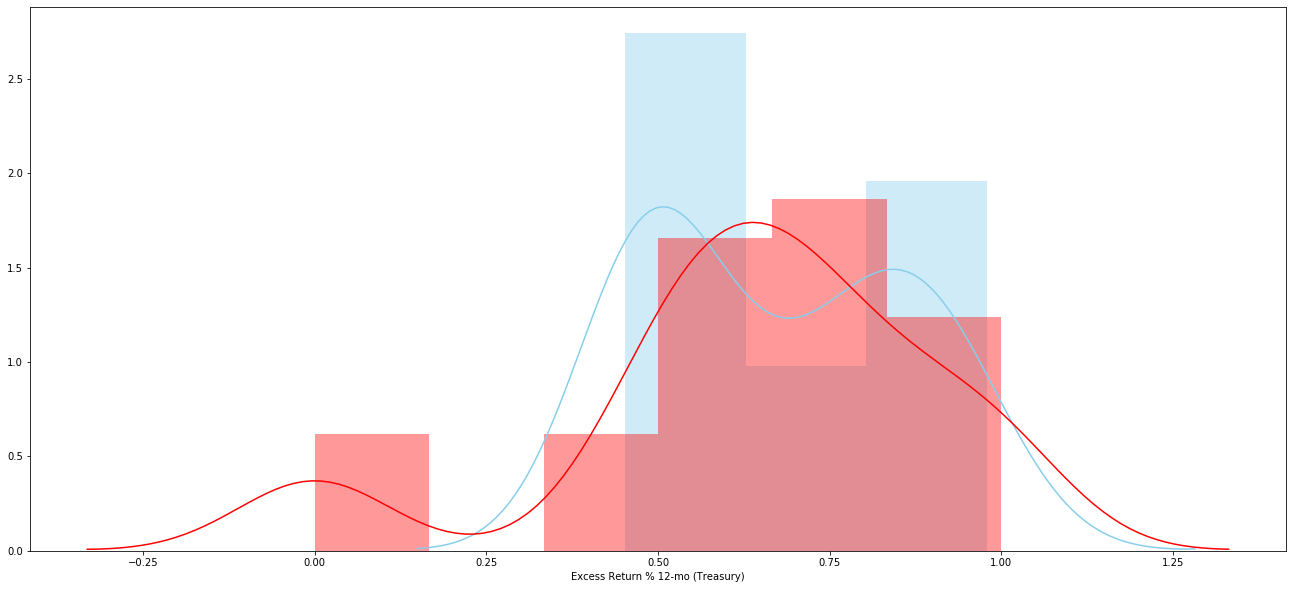

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  29.0  0.673552  0.186544  0.034640   0.602594   
 1  Excess Return % 12-mo (Agg)  29.0  0.495973  0.280136  0.052020   0.389415   
 2                     combined  58.0  0.584762  0.252321  0.033131   0.518418   
 
    Interval  
 0  0.744509  
 1  0.602531  
 2  0.651107  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =    0.1776
 1                              Degrees of freedom =   56.0000
 2                                               t =    2.8413
 3                           Two side test p value =    0.0063
 4                          Difference < 0 p value =    0.9969
 5                          Difference > 0 p value =    0.0031
 6                                       Cohen's d =    0.7462
 7                                       Hedge's g =    0.7361
 8                                   Glass

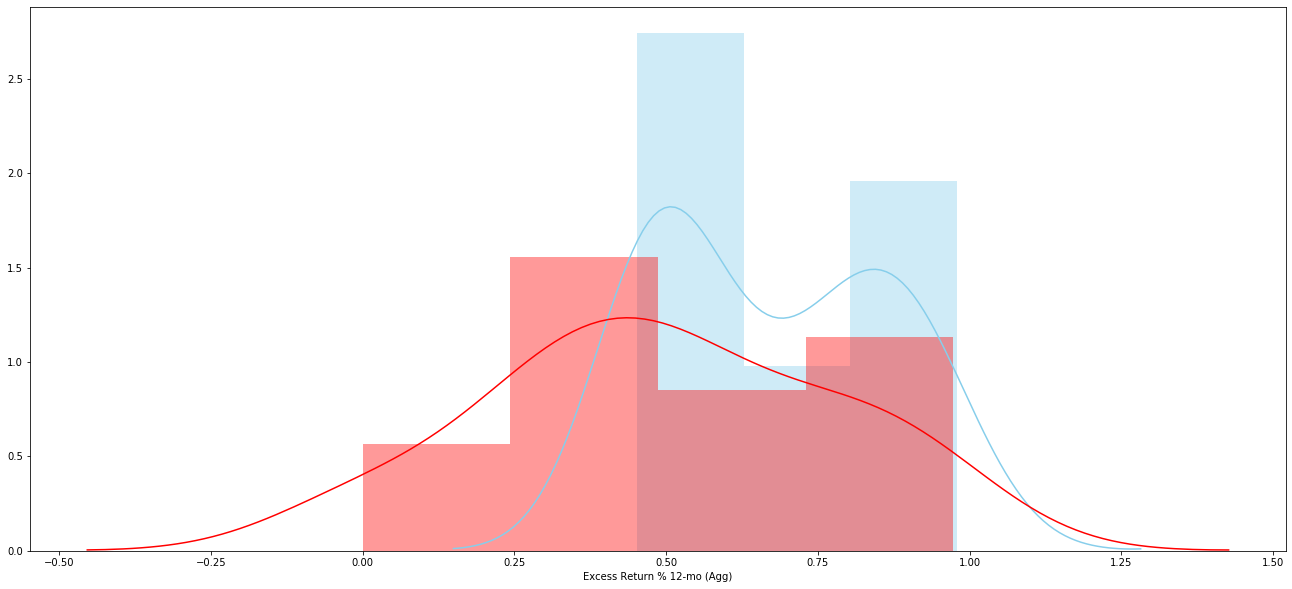

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  29.0  0.673552  0.186544  0.034640   
 1  Excess Return % 24-mo (Treasury)  29.0  0.706023  0.252962  0.046974   
 2                          combined  58.0  0.689787  0.220898  0.029005   
 
    95% Conf.  Interval  
 0   0.602594  0.744509  
 1   0.609801  0.802244  
 2   0.631705  0.747869  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Treas...  -0.0325
 1                              Degrees of freedom =   56.0000
 2                                               t =   -0.5563
 3                           Two side test p value =    0.5802
 4                          Difference < 0 p value =    0.2901
 5                          Difference > 0 p value =    0.7099
 6                                       Cohen's d =   -0.1461
 7                                       Hedge's g =   -0.1441
 8                    

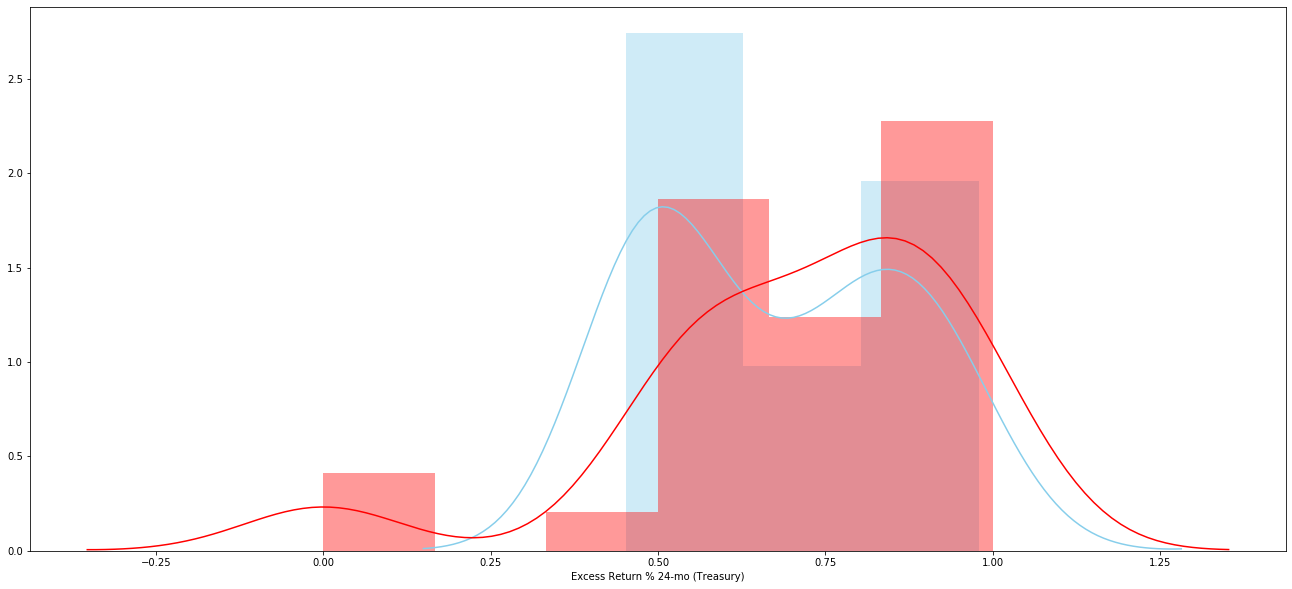

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  29.0  0.673552  0.186544  0.034640   0.602594   
 1  Excess Return % 24-mo (Agg)  29.0  0.492672  0.165307  0.030697   0.429792   
 2                     combined  58.0  0.583112  0.197080  0.025878   0.531292   
 
    Interval  
 0  0.744509  
 1  0.555551  
 2  0.634931  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =    0.1809
 1                              Degrees of freedom =   56.0000
 2                                               t =    3.9080
 3                           Two side test p value =    0.0003
 4                          Difference < 0 p value =    0.9999
 5                          Difference > 0 p value =    0.0001
 6                                       Cohen's d =    1.0263
 7                                       Hedge's g =    1.0125
 8                                   Glass

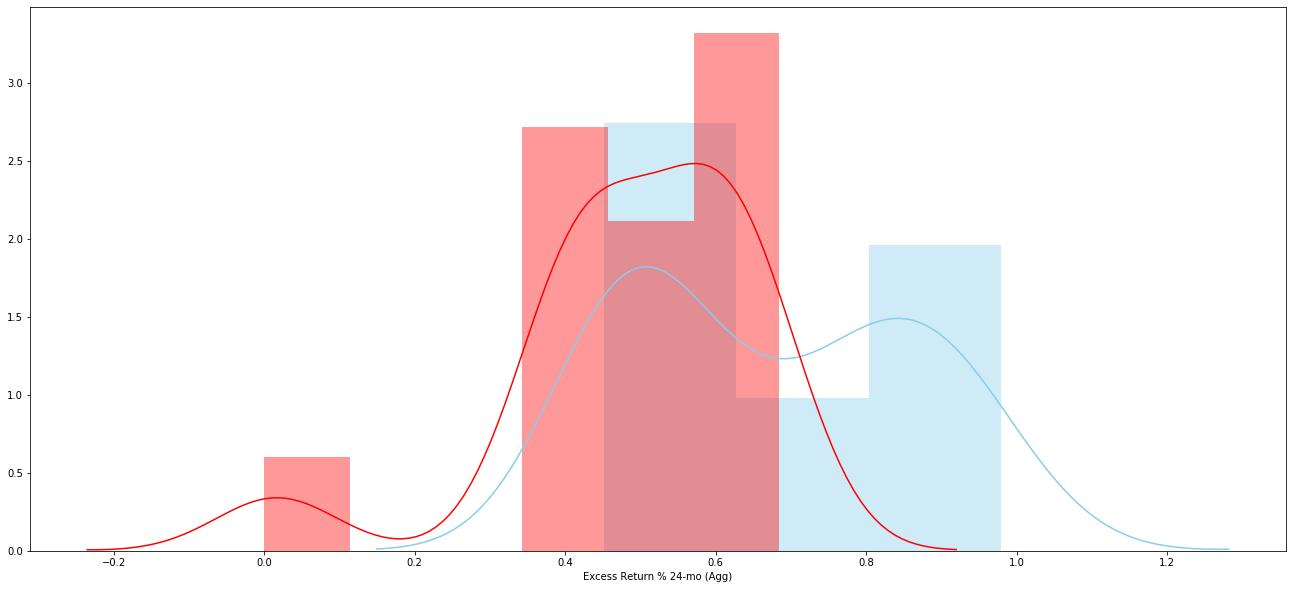

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  29.0  0.673552  0.186544  0.034640   
 1  Excess Return % 36-mo (Treasury)  29.0  0.684134  0.184246  0.034214   
 2                          combined  58.0  0.678843  0.183843  0.024140   
 
    95% Conf.  Interval  
 0   0.602594  0.744509  
 1   0.614051  0.754217  
 2   0.630504  0.727182  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Treas...  -0.0106
 1                              Degrees of freedom =   56.0000
 2                                               t =   -0.2174
 3                           Two side test p value =    0.8287
 4                          Difference < 0 p value =    0.4144
 5                          Difference > 0 p value =    0.5856
 6                                       Cohen's d =   -0.0571
 7                                       Hedge's g =   -0.0563
 8                    

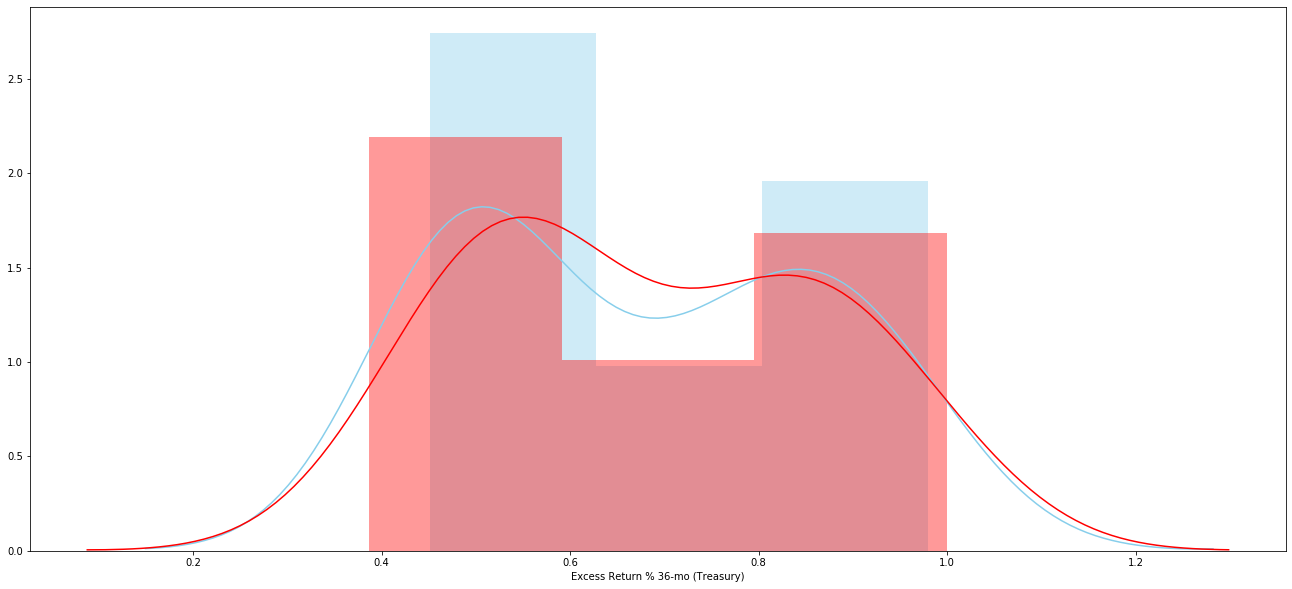

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  29.0  0.673552  0.186544  0.034640   0.602594   
 1  Excess Return % 36-mo (Agg)  29.0  0.525097  0.109137  0.020266   0.483583   
 2                     combined  58.0  0.599324  0.168972  0.022187   0.554895   
 
    Interval  
 0  0.744509  
 1  0.566610  
 2  0.643753  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =    0.1485
 1                              Degrees of freedom =   56.0000
 2                                               t =    3.6990
 3                           Two side test p value =    0.0005
 4                          Difference < 0 p value =    0.9998
 5                          Difference > 0 p value =    0.0002
 6                                       Cohen's d =    0.9714
 7                                       Hedge's g =    0.9583
 8                                   Glass

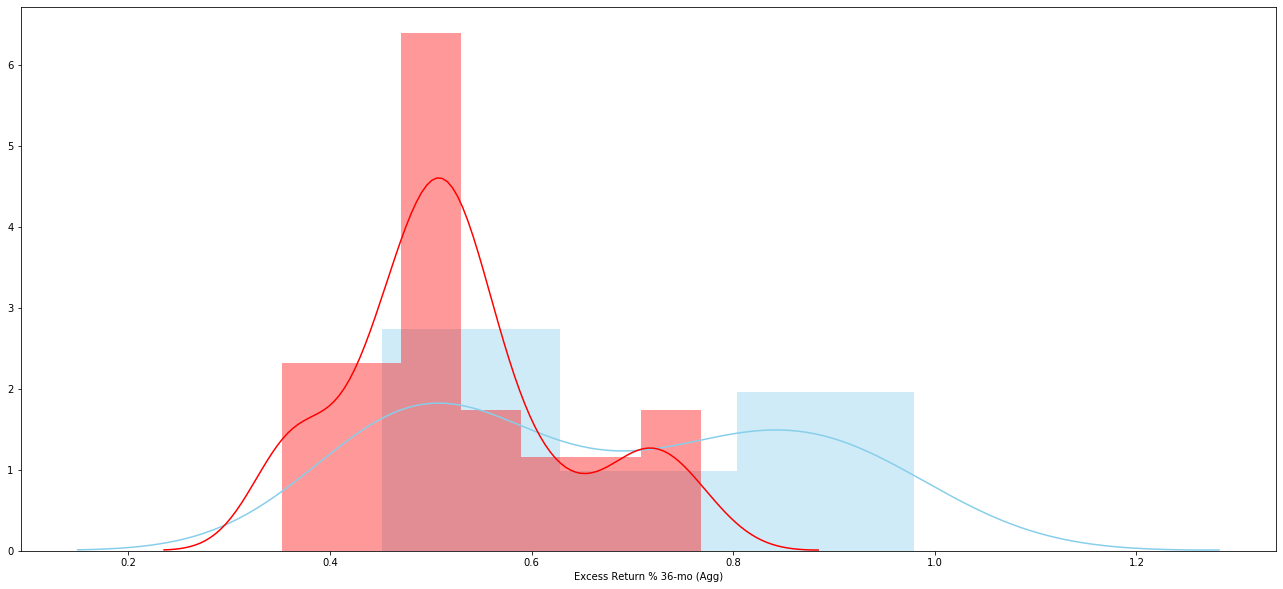

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_CMBS.csv') 

In [36]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,267.000000,267.000000,267.000000,266.000000,266.000000,263.000000,263.000000,260.000000,260.000000,257.000000,257.000000,245.000000,245.000000,233.000000,233.000000,267.000000
mean,0.389551,0.497822,0.503905,0.508826,0.507331,0.502922,0.510516,0.503568,0.489132,0.511401,0.510328,0.513404,0.476935,0.502615,0.482371,2.528090
std,0.327368,0.255197,0.234098,0.260708,0.243181,0.274559,0.258519,0.283993,0.249247,0.276018,0.263561,0.296969,0.226476,0.312065,0.234052,1.062943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.129442,0.374333,0.376337,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.000000
50%,0.299492,0.494333,0.495460,0.510422,0.462486,0.493021,0.474618,0.501222,0.465767,0.519729,0.475128,0.491521,0.445444,0.483095,0.450922,3.000000
75%,0.472081,0.622111,0.625106,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   29.0  0.673552  0.186544  0.034640   
 1  Excess Return % 3-mo (Treasury)  266.0  0.508826  0.260708  0.015985   
 2                         combined  295.0  0.525019  0.258828  0.015070   
 
    95% Conf.  Interval  
 0   0.602594  0.744509  
 1   0.477352  0.540300  
 2   0.495361  0.554677  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.1647
 1                              Degrees of freedom =   293.0000
 2                                               t =     3.3091
 3                           Two side test p value =     0.0011
 4                          Difference < 0 p value =     0.9995
 5                          Difference > 0 p value =     0.0005
 6                                       Cohen's d =     0.6471
 7                                       Hedge's g =     0.6455
 8           

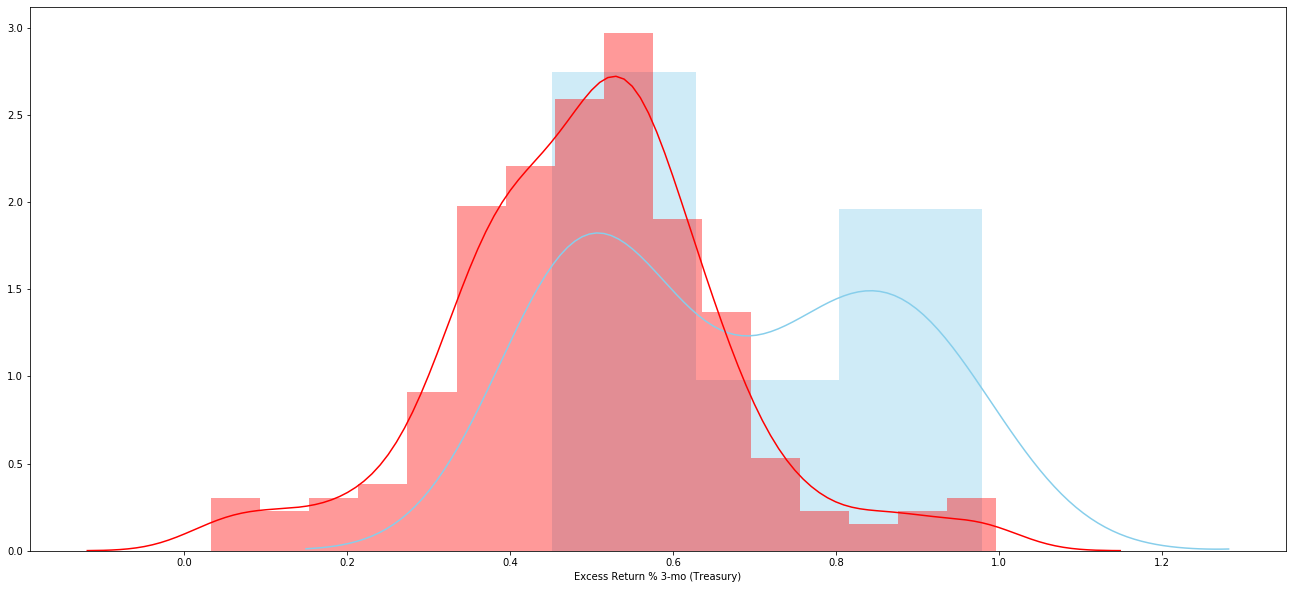

In [38]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   29.0  0.673552  0.186544  0.034640   0.602594   
 1  Excess Return % 3-mo (Agg)  266.0  0.507331  0.243181  0.014910   0.477974   
 2                    combined  295.0  0.523672  0.243054  0.014151   0.495821   
 
    Interval  
 0  0.744509  
 1  0.536689  
 2  0.551522  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.1662
 1                             Degrees of freedom =   293.0000
 2                                              t =     3.5661
 3                          Two side test p value =     0.0004
 4                         Difference < 0 p value =     0.9998
 5                         Difference > 0 p value =     0.0002
 6                                      Cohen's d =     0.6974
 7                                      Hedge's g =     0.6956
 8                                  Glass'

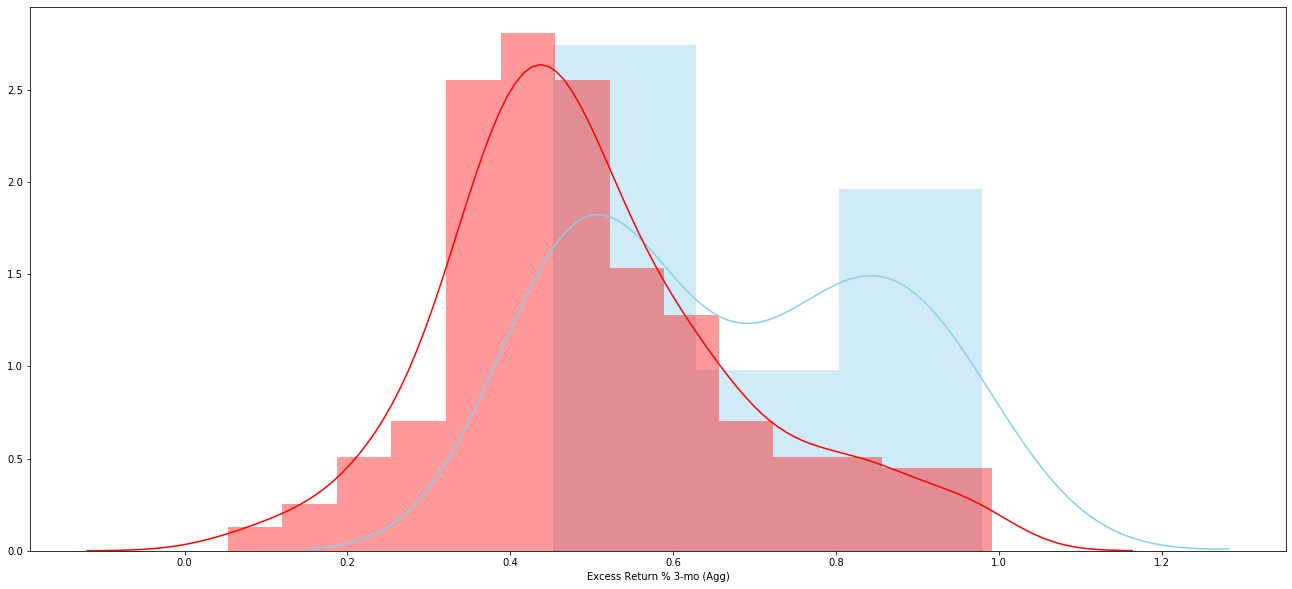

In [40]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   29.0  0.673552  0.186544  0.034640   
 1  Excess Return % 6-mo (Treasury)  263.0  0.502922  0.274559  0.016930   
 2                         combined  292.0  0.519868  0.271720  0.015901   
 
    95% Conf.  Interval  
 0   0.602594  0.744509  
 1   0.469586  0.536258  
 2   0.488572  0.551164  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.1706
 1                              Degrees of freedom =   290.0000
 2                                               t =     3.2621
 3                           Two side test p value =     0.0012
 4                          Difference < 0 p value =     0.9994
 5                          Difference > 0 p value =     0.0006
 6                                       Cohen's d =     0.6383
 7                                       Hedge's g =     0.6366
 8           

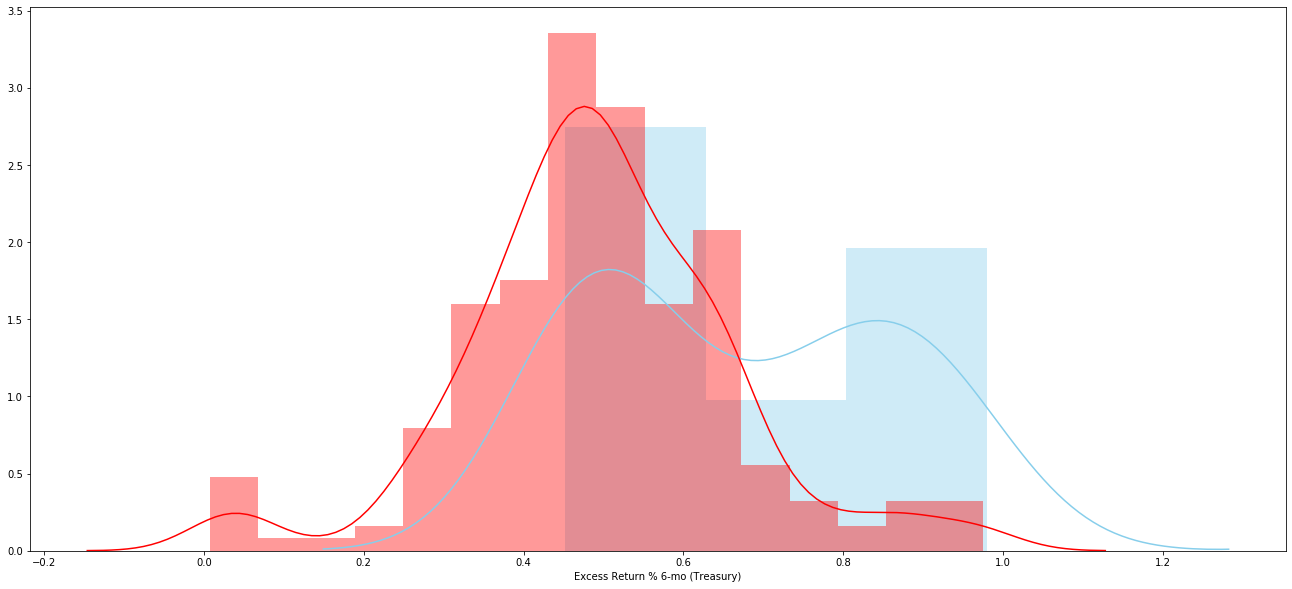

In [42]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   29.0  0.673552  0.186544  0.034640   0.602594   
 1  Excess Return % 6-mo (Agg)  263.0  0.510516  0.258519  0.015941   0.479127   
 2                    combined  292.0  0.526708  0.256722  0.015024   0.497139   
 
    Interval  
 0  0.744509  
 1  0.541904  
 2  0.556276  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.1630
 1                             Degrees of freedom =   290.0000
 2                                              t =     3.3004
 3                          Two side test p value =     0.0011
 4                         Difference < 0 p value =     0.9995
 5                         Difference > 0 p value =     0.0005
 6                                      Cohen's d =     0.6458
 7                                      Hedge's g =     0.6441
 8                                  Glass'

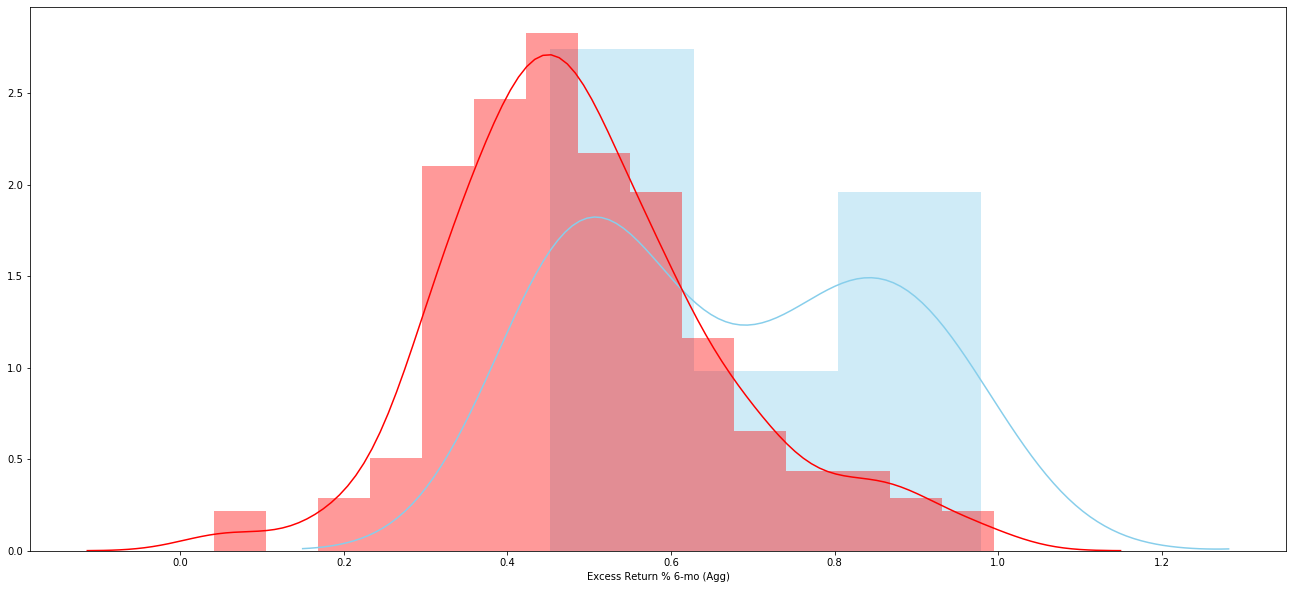

In [44]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   29.0  0.673552  0.186544  0.034640   
 1  Excess Return % 9-mo (Treasury)  260.0  0.503568  0.283993  0.017613   
 2                         combined  289.0  0.520625  0.280235  0.016484   
 
    95% Conf.  Interval  
 0   0.602594  0.744509  
 1   0.468886  0.538250  
 2   0.488180  0.553071  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.1700
 1                              Degrees of freedom =   287.0000
 2                                               t =     3.1458
 3                           Two side test p value =     0.0018
 4                          Difference < 0 p value =     0.9991
 5                          Difference > 0 p value =     0.0009
 6                                       Cohen's d =     0.6159
 7                                       Hedge's g =     0.6143
 8           

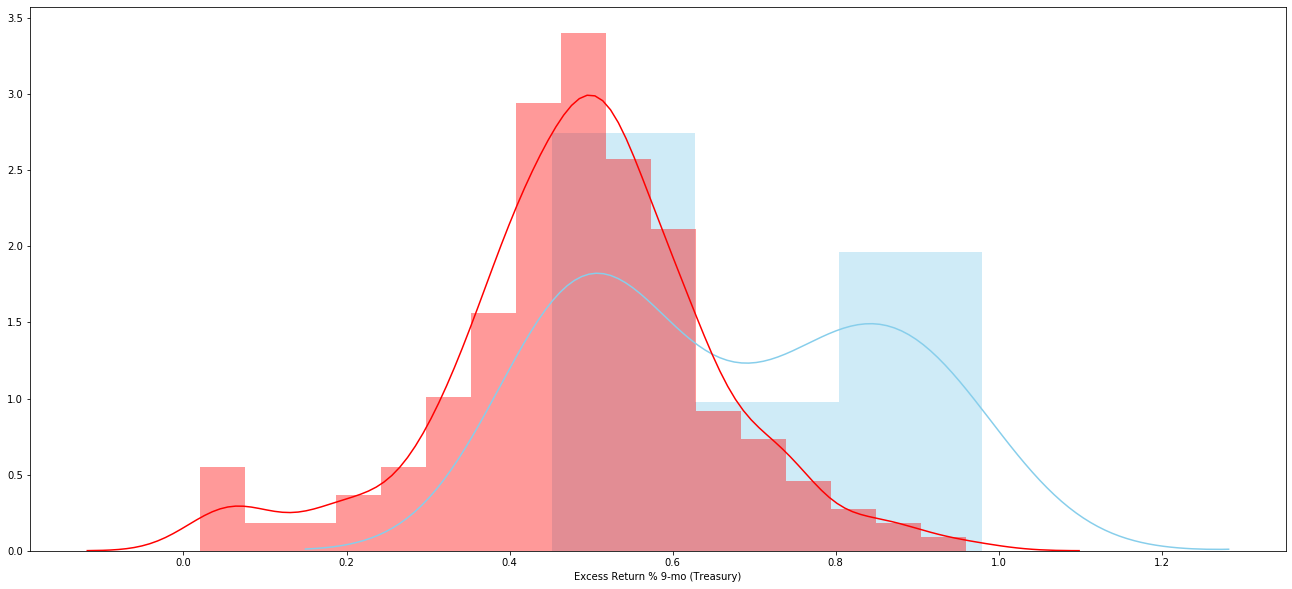

In [46]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   29.0  0.673552  0.186544  0.034640   0.602594   
 1  Excess Return % 9-mo (Agg)  260.0  0.489132  0.249247  0.015458   0.458693   
 2                    combined  289.0  0.507637  0.249665  0.014686   0.478732   
 
    Interval  
 0  0.744509  
 1  0.519570  
 2  0.536543  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.1844
 1                             Degrees of freedom =   287.0000
 2                                              t =     3.8631
 3                          Two side test p value =     0.0001
 4                         Difference < 0 p value =     0.9999
 5                         Difference > 0 p value =     0.0001
 6                                      Cohen's d =     0.7563
 7                                      Hedge's g =     0.7543
 8                                  Glass'

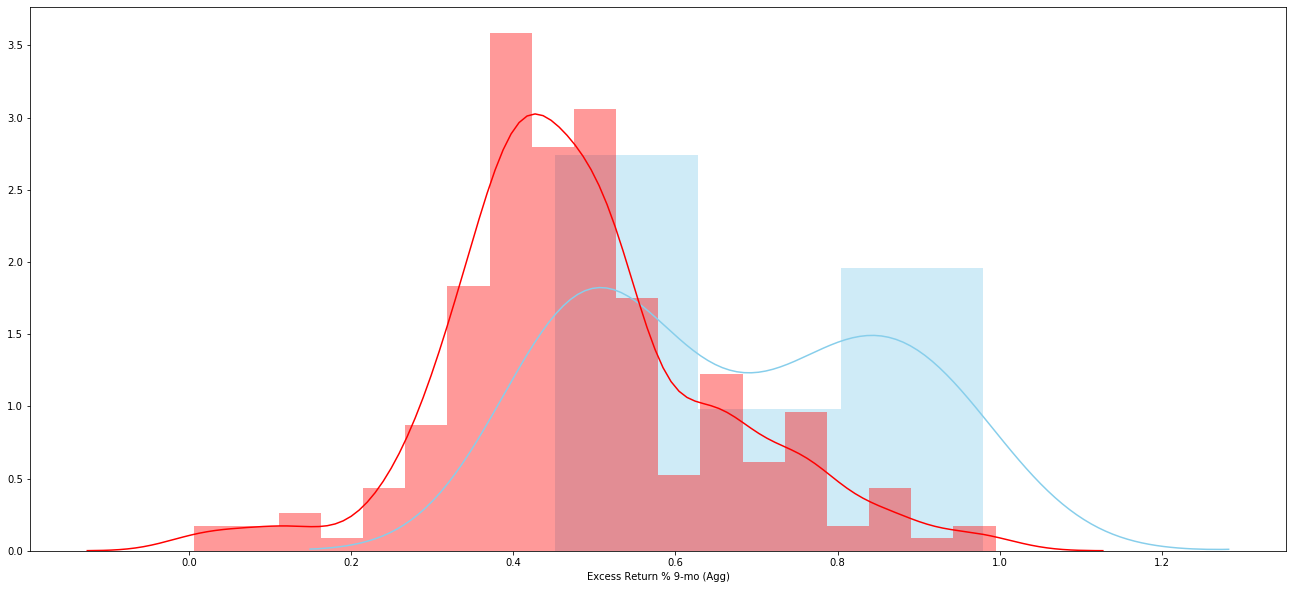

In [48]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   29.0  0.673552  0.186544  0.034640   
 1  Excess Return % 12-mo (Treasury)  257.0  0.511401  0.276018  0.017217   
 2                          combined  286.0  0.527843  0.272500  0.016113   
 
    95% Conf.  Interval  
 0   0.602594  0.744509  
 1   0.477495  0.545307  
 2   0.496127  0.559559  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.1622
 1                              Degrees of freedom =   284.0000
 2                                               t =     3.0826
 3                           Two side test p value =     0.0023
 4                          Difference < 0 p value =     0.9989
 5                          Difference > 0 p value =     0.0011
 6                                       Cohen's d =     0.6039
 7                                       Hedge's g =     0.6023
 8       

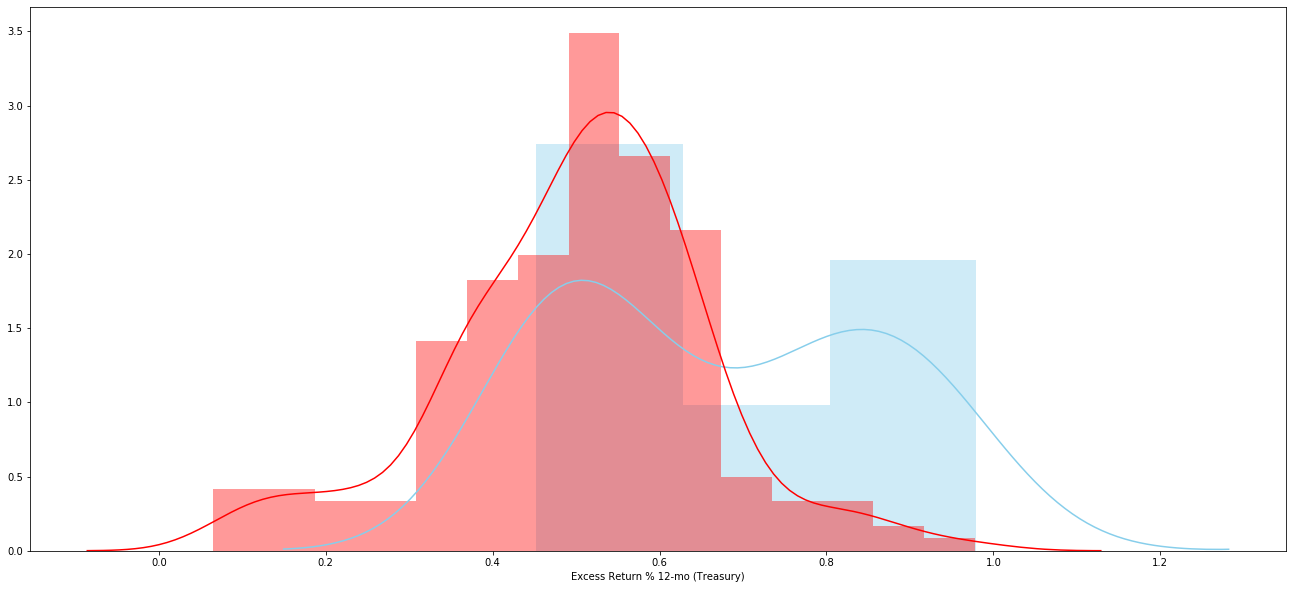

In [50]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   29.0  0.673552  0.186544  0.034640   
 1  Excess Return % 12-mo (Agg)  257.0  0.510328  0.263561  0.016440   
 2                     combined  286.0  0.526879  0.261249  0.015448   
 
    95% Conf.  Interval  
 0   0.602594  0.744509  
 1   0.477952  0.542704  
 2   0.496472  0.557285  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.1632
 1                              Degrees of freedom =   284.0000
 2                                               t =     3.2422
 3                           Two side test p value =     0.0013
 4                          Difference < 0 p value =     0.9993
 5                          Difference > 0 p value =     0.0007
 6                                       Cohen's d =     0.6351
 7                                       Hedge's g =     0.6334
 8                           

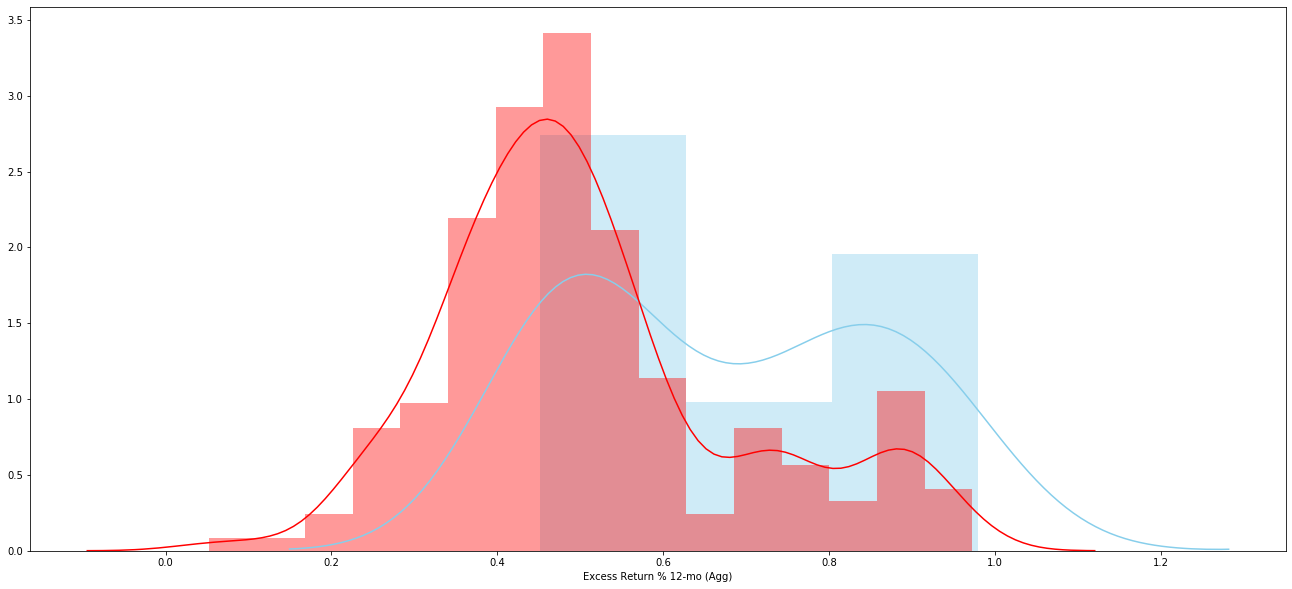

In [52]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   29.0  0.673552  0.186544  0.034640   
 1  Excess Return % 24-mo (Treasury)  245.0  0.513404  0.296969  0.018973   
 2                          combined  274.0  0.530354  0.291252  0.017595   
 
    95% Conf.  Interval  
 0   0.602594  0.744509  
 1   0.476033  0.550775  
 2   0.495714  0.564993  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.1601
 1                              Degrees of freedom =   272.0000
 2                                               t =     2.8359
 3                           Two side test p value =     0.0049
 4                          Difference < 0 p value =     0.9975
 5                          Difference > 0 p value =     0.0025
 6                                       Cohen's d =     0.5569
 7                                       Hedge's g =     0.5554
 8       

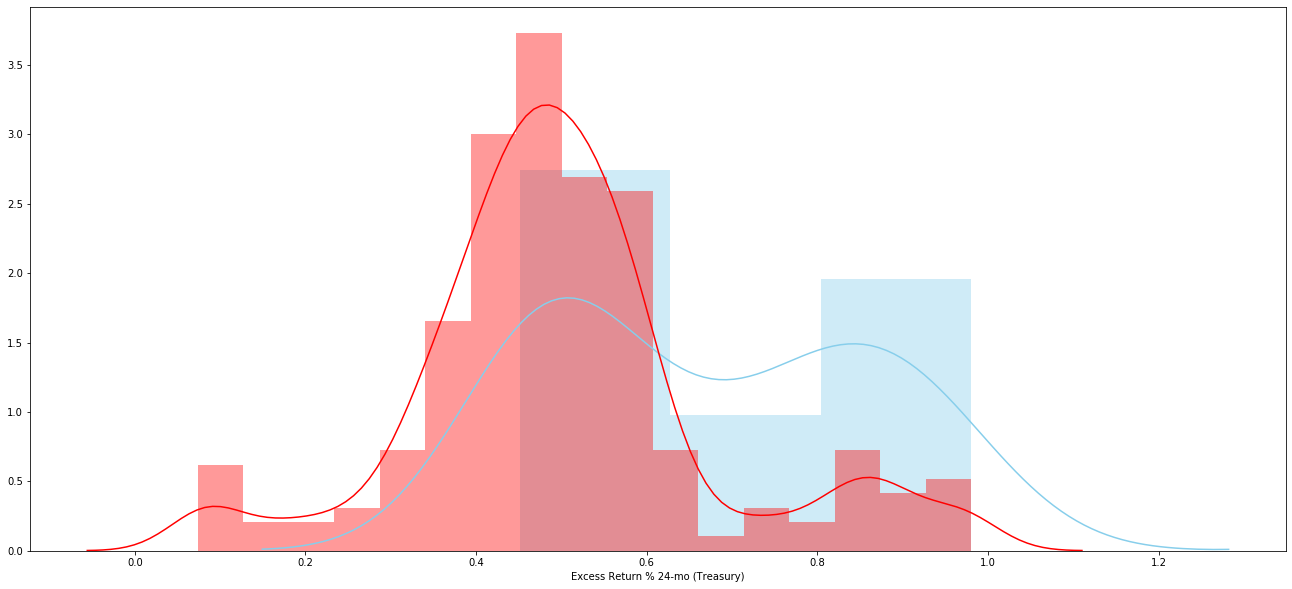

In [54]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   29.0  0.673552  0.186544  0.034640   
 1  Excess Return % 24-mo (Agg)  245.0  0.476935  0.226476  0.014469   
 2                     combined  274.0  0.497744  0.230399  0.013919   
 
    95% Conf.  Interval  
 0   0.602594  0.744509  
 1   0.448434  0.505435  
 2   0.470342  0.525147  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.1966
 1                              Degrees of freedom =   272.0000
 2                                               t =     4.4959
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.8829
 7                                       Hedge's g =     0.8805
 8                           

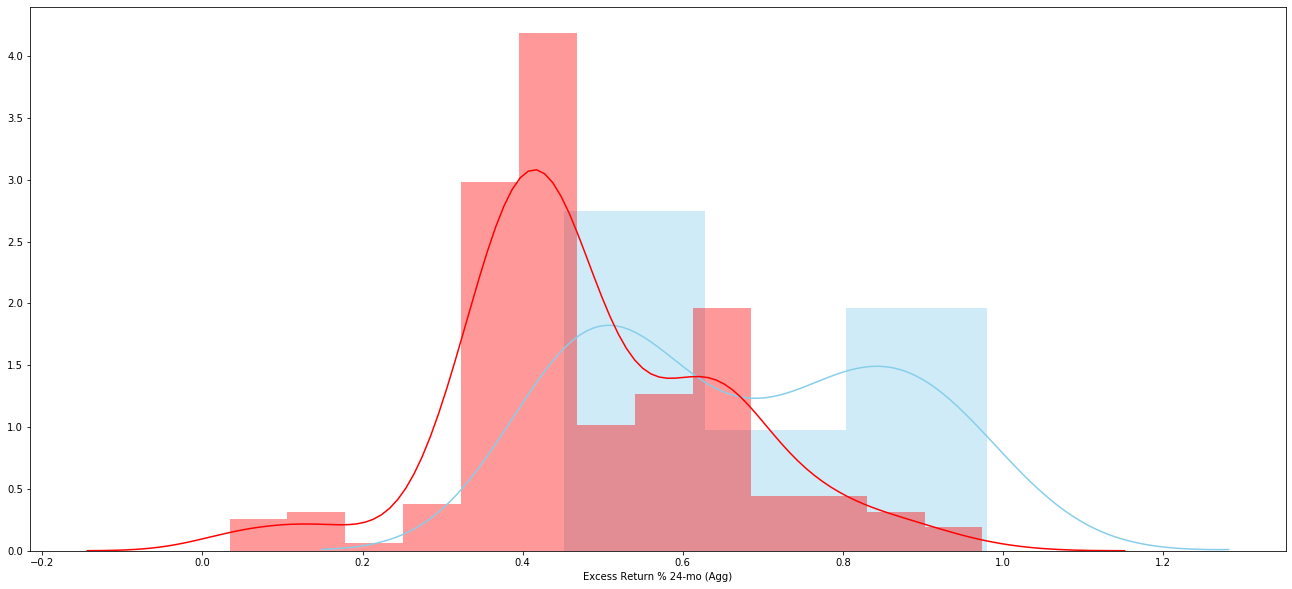

In [56]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   29.0  0.673552  0.186544  0.034640   
 1  Excess Return % 36-mo (Treasury)  233.0  0.502615  0.312065  0.020444   
 2                          combined  262.0  0.521535  0.305262  0.018859   
 
    95% Conf.  Interval  
 0   0.602594  0.744509  
 1   0.462335  0.542895  
 2   0.484400  0.558671  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.1709
 1                              Degrees of freedom =   260.0000
 2                                               t =     2.8833
 3                           Two side test p value =     0.0043
 4                          Difference < 0 p value =     0.9979
 5                          Difference > 0 p value =     0.0021
 6                                       Cohen's d =     0.5678
 7                                       Hedge's g =     0.5661
 8       

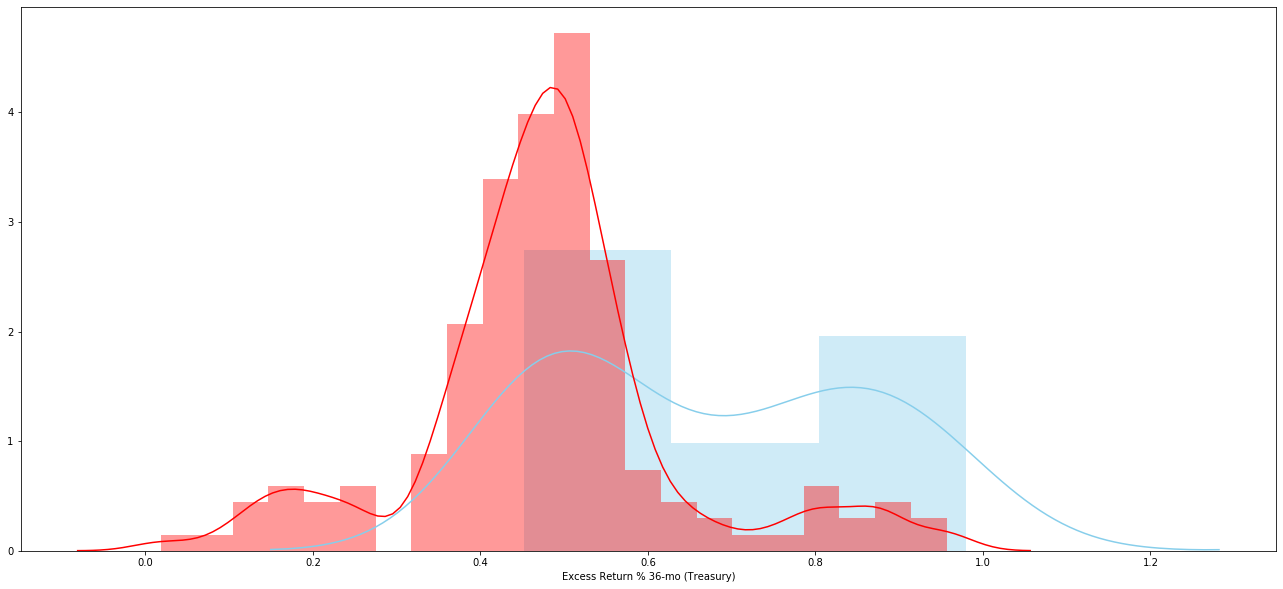

In [58]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   29.0  0.673552  0.186544  0.034640   
 1  Excess Return % 36-mo (Agg)  233.0  0.482371  0.234052  0.015333   
 2                     combined  262.0  0.503532  0.236724  0.014625   
 
    95% Conf.  Interval  
 0   0.602594  0.744509  
 1   0.452161  0.512581  
 2   0.474734  0.532330  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.1912
 1                              Degrees of freedom =   260.0000
 2                                               t =     4.2321
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.8334
 7                                       Hedge's g =     0.8310
 8                           

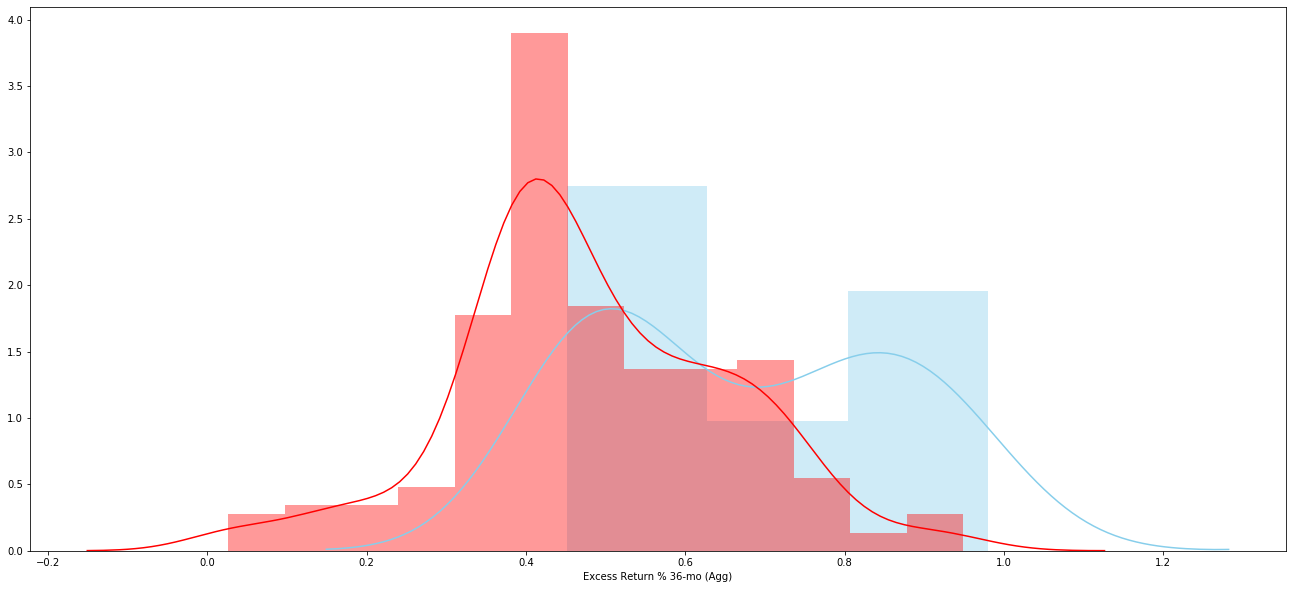

In [60]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")